<a href="https://colab.research.google.com/github/fabianflorez0904/Taller1-mapas-dinamicos/blob/main/src/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taller 1 de Sistemas Basados en Geolocalización**

## Introducción
Este taller tiene como objetivo aplicar conceptos de geolocalización y cálculo de distancias utilizando la fórmula de Haversine. Además, se explorará la variación del área de la Laguna de Fúquene a lo largo del tiempo para evaluar su impacto en la delimitación de terrenos y desplazamiento de poblaciones. Los resultados deberán ser sustentados mediante mapas dinámicos y análisis comparativos.

---

## Profesor: Carlos Armando López Solano, MSc.

### 1. Cálculo de distancias con la fórmula de Haversine
Desarrolle un sistema de software que, mediante el uso de la fórmula de Haversine, calcule la distancia en cada caso:

| Caso | Φ₁ (Latitud 1) | λ₁ (Longitud 1) | Φ₂ (Latitud 2) | λ₂ (Longitud 2) |
|------|---------------|---------------|---------------|---------------|
| 1    | 4.6369566546922485 | -74.08344303563474 | 4.698387290122269 | -74.08913229761984 |
| 2    | 2.4930822620498403 | -76.56469927139997 | 4.553288632232513 | -75.65871130171998 |
| 3    | 7.141088134111742 | -73.11869057856512 | 42.35927858183055 | -71.09328053009632 |

Luego, compare el resultado obtenido con la medición de dicha distancia utilizando el mapa dinámico de su preferencia.

#### Preguntas:
- ¿Qué ubicaciones corresponden a las coordenadas dadas?
- ¿Qué conclusión puede sacar de estas mediciones?

---

In [2]:
# Import Required Libraries

# Import folium library for creating maps
import folium
import math

In [3]:
class Coordenada:
    def __init__(self,city:str,name:str,latitude:float,longitude:float):
        self.city = city
        self.name = name
        self.latitude = latitude
        self.longitude = longitude

    def get_latitude(self):
        return self.latitude

    def get_longitude(self):
        return self.longitude

    def __str__(self):
        return f"City: {self.city}, Name: {self.name}, Latitude: {self.latitude}, Longitude: {self.longitude}"


class TierraPlana:
    def __init__(self):
        self.coordenadas = []

    def agregar_coordenada(self, coordenada:Coordenada):
        self.coordenadas.append(coordenada)

    def distancia_entre_coordenadas(self,coordenada1:Coordenada,coordenada2:Coordenada) -> float:
        return self.haversine(coordenada1.get_latitude(),coordenada1.get_longitude(),coordenada2.get_latitude(),coordenada2.get_longitude())

    def get_coordenada(self,name:str) -> Coordenada:
        for coordenada in self.coordenadas:
            if coordenada.name == name:
                return coordenada
        return None

    def radio_tierra_en_latitud(self, lat:float) -> float:
        a = 6378.137  #Radius at sea level at equator
        b = 6356.752  #Radius at poles

        c = (a**2*math.cos(lat))**2
        d = (b**2*math.sin(lat))**2
        e = (a*math.cos(lat))**2
        f = (b*math.sin(lat))**2

        return math.sqrt((c+d)/(e+f))

    def haversine(self, Lat1:float,Lon1:float,lat2:float,lon2:float) -> float:
        # El radio lo calculamos con el prodmedio de las latitudes
        R = self.radio_tierra_en_latitud((Lat1+lat2)/2)

        # Calculamos la formula de haversine
        dLat = math.radians(lat2 - Lat1)
        dLon = math.radians(lon2 - Lon1)
        a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(math.radians(Lat1)) * math.cos(math.radians(lat2)) * math.sin(dLon/2) * math.sin(dLon/2)
        c = 2*R*math.atan(math.sqrt(a))
        return c

    def mostrar_coordenadas(self):
        for coordenada in self.coordenadas:
            print(coordenada)

class Mapa:
    def crear_mapa(self,coordenada1:Coordenada,coordenada2:Coordenada):

        distancia_coordenadas = TierraPlana().distancia_entre_coordenadas(coordenada1,coordenada2)
        if distancia_coordenadas < 100:
            zoom = 12
        elif distancia_coordenadas < 300:
            zoom = 8
        else:
            zoom = 3

        dlat = (coordenada1.get_latitude() + coordenada2.get_latitude())/2
        dlon = (coordenada1.get_longitude() + coordenada2.get_longitude())/2

        map_osm = folium.Map(location=[dlat, dlon], zoom_start=zoom)

        folium.Marker(
            location=[coordenada1.get_latitude(), coordenada1.get_longitude()],
            popup=f"{coordenada1.city} - {coordenada1.name}"
        ).add_to(map_osm)

        folium.Marker(
            location=[coordenada2.get_latitude(), coordenada2.get_longitude()],
            popup=f"{coordenada2.city} - {coordenada2.name}"
        ).add_to(map_osm)

        folium.PolyLine(
            locations=[[coordenada1.get_latitude(),coordenada1.get_longitude()],[coordenada2.get_latitude(),coordenada2.get_longitude()]],
            color="#FF0000",
            weight=5,
            tooltip="Distancia: {:.2f} km".format(distancia_coordenadas),
        ).add_to(map_osm)
        return map_osm



In [4]:
casos = [
    {"city": "Bogota", "name":"Universidad Nacional", "latitude": 4.6369566546922485, "longitude": -74.08344303563474 },
    {"city": "Bogota", "name":"Universidad Uniminuto", "latitude": 4.698387290122269, "longitude": -74.08913229761984 },
    {"city": "Popayan", "name":"Casa de mi EX", "latitude": 2.4930822620498403, "longitude": -76.56469927139997},
    {"city": "Armenia", "name":"Universidad del Quindio", "latitude": 4.553288632232513, "longitude": -75.65871130171998},
    {"city": "Bucaramanga", "name":"Universidad industrial de Santander", "latitude": 4.553288632232513, "longitude": -75.65871130171998},
    {"city": "Boston", "name":"Massachusetts institute of technology", "latitude": 42.35927858183055 , "longitude": -71.09328053009632}

]

tierra_plana = TierraPlana()

coordenadas = []

for caso in casos:
    coordenada = Coordenada(caso["city"],caso["name"], caso["latitude"], caso["longitude"])
    tierra_plana.agregar_coordenada(coordenada)


### **Caso 1**

In [5]:
cordenada1 = tierra_plana.get_coordenada("Universidad Nacional")
cordenada2 = tierra_plana.get_coordenada("Universidad Uniminuto")
distancia_coordenadas = tierra_plana.distancia_entre_coordenadas(cordenada1,cordenada2)

print(f"La distancia entre las siguientes coordenadas es {distancia_coordenadas:.2f} KM")
print(cordenada1)
print(cordenada2)

miMapa = Mapa()
miMapa.crear_mapa(cordenada1,cordenada2)

La distancia entre las siguientes coordenadas es 6.84 KM
City: Bogota, Name: Universidad Nacional, Latitude: 4.6369566546922485, Longitude: -74.08344303563474
City: Bogota, Name: Universidad Uniminuto, Latitude: 4.698387290122269, Longitude: -74.08913229761984


### **Caso 2**

In [6]:
cordenada3 = tierra_plana.get_coordenada("Casa de mi EX")
cordenada4 = tierra_plana.get_coordenada("Universidad del Quindio")
distancia_coordenadas = tierra_plana.distancia_entre_coordenadas(cordenada3,cordenada4)

print(f"La distancia entre las siguientes coordenadas es {distancia_coordenadas:.2f} KM")
print(cordenada3)
print(cordenada4)

miMapa = Mapa()
miMapa.crear_mapa(cordenada3,cordenada4)

La distancia entre las siguientes coordenadas es 250.29 KM
City: Popayan, Name: Casa de mi EX, Latitude: 2.4930822620498403, Longitude: -76.56469927139997
City: Armenia, Name: Universidad del Quindio, Latitude: 4.553288632232513, Longitude: -75.65871130171998


### **Caso 3**

In [7]:
cordenada5 = tierra_plana.get_coordenada("Universidad industrial de Santander")
cordenada6 = tierra_plana.get_coordenada("Massachusetts institute of technology")
distancia_coordenadas = tierra_plana.distancia_entre_coordenadas(cordenada5,cordenada6)

print(f"La distancia entre las siguientes coordenadas es {distancia_coordenadas:.2f} KM")
print(cordenada5)
print(cordenada6)

miMapa = Mapa()
miMapa.crear_mapa(cordenada5,cordenada6)

La distancia entre las siguientes coordenadas es 4003.94 KM
City: Bucaramanga, Name: Universidad industrial de Santander, Latitude: 4.553288632232513, Longitude: -75.65871130171998
City: Boston, Name: Massachusetts institute of technology, Latitude: 42.35927858183055, Longitude: -71.09328053009632


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


### 2. Análisis del área de la Laguna de Fúquene
La Laguna de Fúquene tiene un área que varía cada dos décadas, contrayéndose y expandiéndose.

Para ayudar a los gobernadores de Boyacá y Cundinamarca a tomar decisiones sobre el desplazamiento de campesinos y la delimitación de fincas, se solicita determinar el porcentaje del área de crecimiento de la laguna (diferencia entre las áreas máxima y mínima). Pueden utilizar el método que deseen.

#### Requisitos:
- Presentar el resultado final en un mapa dinámico.
- Sustentar el análisis con datos y metodología utilizada.

---

## Bibliografía sugerida
- J. A. E. García Álvarez, “ASÍ FUNCIONA EL GPS,” 2015. [Online]. Available: [https://goo.gl/eXsp7K](https://goo.gl/eXsp7K). [Accessed: 25-Feb-2017].
- C. Beatty, “Location-Based Services: Navigation for the Masses, At Last!,” Journal of Navigation, 30-May-2002. [Online]. Available: [https://goo.gl/uXwEwI](https://goo.gl/uXwEwI). [Accessed: 12-Apr-2017].


In [9]:
# Maximo de la laguna
"""
LOGITUDE,LATITUDE
5.496403290635662, -73.77942919105018
5.496316481286278, -73.77461877522737
5.4920412597801755, -73.77135348838962
5.4890563598662405, -73.76824506962947
5.48640640473923, -73.76276046140462
5.48589405307522, -73.7576124137477
5.488708461843205, -73.75169144747659
5.491785175582152, -73.74628235370444
5.484436577000744, -73.73993079880437
5.480307551325526, -73.73948854202767
5.4713409311259165, -73.74310043804262
5.468831589277839, -73.74302948684347
5.468131042567606, -73.74319890450427
5.469450844605428, -73.74080883361475
5.471403395651907, -73.73819171154572
5.472499024732477, -73.73539066217926
5.474808991226103, -73.73271616098691
5.47729359857145, -73.73123754041377
5.479281332637236, -73.73097410499912
5.481782499726294, -73.72945393377067
5.4818875707069035, -73.7287769348191
5.479344097105112, -73.72880404768833
5.478980839556241, -73.72842068295584
5.480387441040613, -73.72515997901158
5.481209837946419, -73.72450047800646
5.481935234258244, -73.7212297091005
5.4806855134781705, -73.7178875478777
5.478159854025165, -73.71562534497365
5.475456036361992, -73.71431646167491
5.467713560159074, -73.7140951176147
5.463863072237523, -73.71505115821313
5.459337091317102, -73.71723663396936
5.45368732723066, -73.72056330874247
5.44678975250332, -73.72521954026516
5.43592920396964, -73.73172914695077
5.425821100496829, -73.73926948366257
5.4257211593931505, -73.7511323640268
5.435341201491122, -73.75406358241325
5.4509424894949605, -73.76108669132982
5.45714752857865, -73.76721918114696
5.470554046534802, -73.77095105911872
5.478261024693409, -73.77425752144988
5.488784595411729, -73.77859331836471
"""

'\nLOGITUDE,LATITUDE\n5.496403290635662, -73.77942919105018\n5.496316481286278, -73.77461877522737\n5.4920412597801755, -73.77135348838962\n5.4890563598662405, -73.76824506962947\n5.48640640473923, -73.76276046140462\n5.48589405307522, -73.7576124137477\n5.488708461843205, -73.75169144747659\n5.491785175582152, -73.74628235370444\n5.484436577000744, -73.73993079880437\n5.480307551325526, -73.73948854202767\n5.4713409311259165, -73.74310043804262\n5.468831589277839, -73.74302948684347\n5.468131042567606, -73.74319890450427\n5.469450844605428, -73.74080883361475\n5.471403395651907, -73.73819171154572\n5.472499024732477, -73.73539066217926\n5.474808991226103, -73.73271616098691\n5.47729359857145, -73.73123754041377\n5.479281332637236, -73.73097410499912\n5.481782499726294, -73.72945393377067\n5.4818875707069035, -73.7287769348191\n5.479344097105112, -73.72880404768833\n5.478980839556241, -73.72842068295584\n5.480387441040613, -73.72515997901158\n5.481209837946419, -73.72450047800646\n5.48

In [11]:
# <!-- collapse=True -->
# importando modulos necesarios
import matplotlib.pyplot as plt
import numpy as np # importando numpy
import pandas as pd # importando pandas
from scipy import stats

np.random.seed(1984) # para poder replicar el random

%matplotlib inline

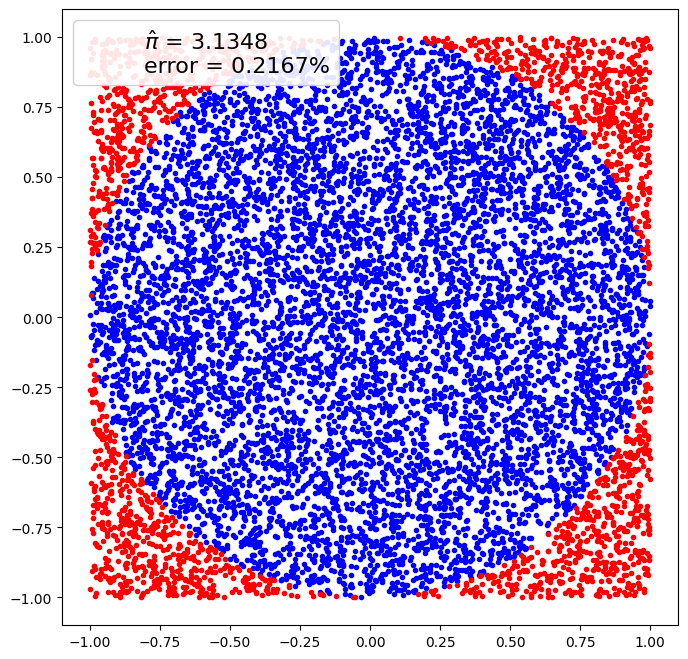

In [12]:
# Ejemplo: Aproximando el valor de pi - área de un círculo de
# radio = 1.

def mc_pi_aprox(N=10000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


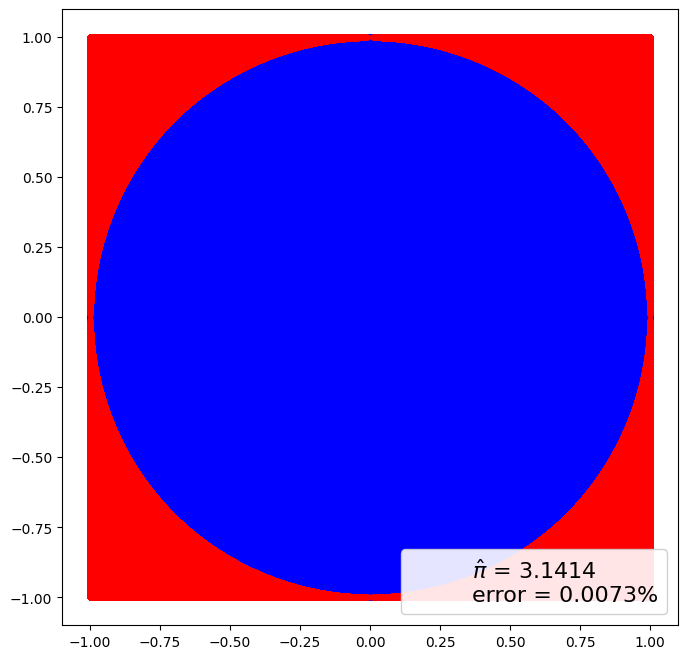

In [13]:

mc_pi_aprox(100000000)